In [13]:
import tensorflow as tf

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)

In [16]:
data_dir = pathlib.Path(data_dir)
print(data_dir)

C:\Users\laure\.keras\datasets\flower_photos


In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3666

In [18]:
DATA_CLASSES = [item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]
print(DATA_CLASSES)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [19]:
import random
from basicCNN import *

IMG_SIZE = 50
training_data , testing_data,  distribution = create_training_data(data_dir, IMG_SIZE, DATA_CLASSES)



In [20]:
print(len(training_data))

i = 0

#print out the proportions of each class of data
for elem in distribution:
    
    print('Proportion of ' + str(DATA_CLASSES[i]))
    print(elem / image_count)
    i+=1

2935
Proportion of daisy
0.1723949809056192
Proportion of dandelion
0.24440807419530824
Proportion of roses
0.1745771958537916
Proportion of sunflowers
0.190671031096563
Proportion of tulips
0.21794871794871795


This image


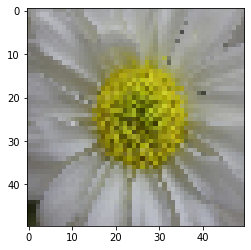

is represented like this to our code 
 
[[[142 143 143]
  [151 149 149]
  [165 159 159]
  ...
  [172 168 168]
  [157 157 157]
  [151 153 153]]

 [[132 135 136]
  [149 151 151]
  [178 173 173]
  ...
  [164 159 160]
  [156 156 156]
  [146 146 147]]

 [[108 120 122]
  [149 151 151]
  [156 153 153]
  ...
  [161 157 158]
  [157 157 157]
  [127 131 132]]

 ...

 [[ 18  39  36]
  [ 27  44  41]
  [ 91  94  94]
  ...
  [120 123 126]
  [119 124 126]
  [115 121 124]]

 [[ 21  44  41]
  [ 25  48  44]
  [ 79  86  88]
  ...
  [129 129 133]
  [121 124 128]
  [121 124 128]]

 [[ 26  47  44]
  [ 29  50  48]
  [ 59  70  71]
  ...
  [135 136 140]
  [129 130 134]
  [125 126 130]]]


In [21]:
#split into data point and label (X,y)
X , y = restructure_data(training_data)

#take a look at a piece of data
print('This image')

check_image = training_data[0][0]
check_image = cv2.cvtColor(check_image, cv2.COLOR_BGR2RGB)
plt.imshow(check_image)
plt.show()

print('is represented like this to our code \n ')

print(training_data[0][0])
#print(testing_data[0][0])


In [22]:
X = X/255.0

model = build_model(X,y,len(DATA_CLASSES))

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Train on 2054 samples, validate on 881 samples
Epoch 1/3
2054/2054 [==============================] - 43s 21ms/sample - loss: 1.2365 - acc: 0.4318 - val_loss: 7.0452 - val_acc: 0.0760
Epoch 2/3
2054/2054 [==============================] - 40s 20ms/sample - loss: 0.8681 - acc: 0.6422 - val_loss: 8.7056 - val_acc: 0.1998
Epoch 3/3
2054/2054 [==============================] - 43s 21ms/sample - loss: 0.7633 - acc: 0.6938 - val_loss: 9.3029 - val_acc: 0.1884


In [23]:
X_test, y_test = restructure_data(testing_data)
predictions = model.predict(X_test)

error_occurances = []
i = 0

while i < len(predictions):
    
    if not np.argmax(predictions[i]) == y_test[i]:
        error_occurances.append(i)
        
    i+=1
    
print('The model was right ' + str(100*(1-len(error_occurances)/len(predictions))) + '% of the time')
   

The model was right 42.54445964432284% of the time


The model predicted that this image is in the category of daisy and it is in the category of sunflowers


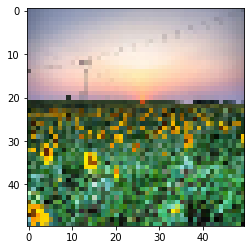

In [28]:
import random
#check a random data point from all of X_test
#check = random.randint(0,len(X_test)-1) 
#or check one of the mrked errors
check = error_occurances[random.randint(0, len(error_occurances)-1)]

print('The model predicted that this image is in the category of ' + DATA_CLASSES[np.argmax(predictions[check])] + 
      ' and it is in the category of ' + DATA_CLASSES[y_test[check]])
fix_colors = cv2.cvtColor(X_test[check], cv2.COLOR_BGR2RGB)
plt.imshow(fix_colors)
plt.show()